Surface Area: 3.1494
Edge Length: 12.6652


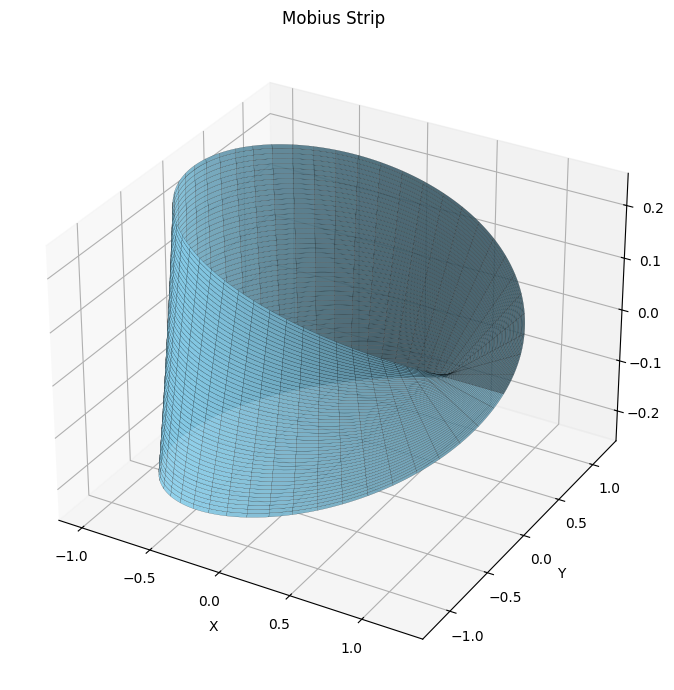

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

class MobiusStrip:
    def __init__(self, R=1.0, w=0.5, n=100):
        """
        Initialize the Mobius strip with:
        R: Radius from center to strip
        w: Width of the strip
        n: Resolution (number of points in u and v)
        """
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self.compute_coordinates()

    def compute_coordinates(self):
        """
        Computes the 3D coordinates of the Mobius strip using the parametric equations.
        """
        u = self.U
        v = self.V
        R = self.R
        x = (R + v * np.cos(u / 2)) * np.cos(u)
        y = (R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def surface_area(self):
        """
        Numerically computes the surface area of the Mobius strip using cross products.
        """
        du = self.u[1] - self.u[0]
        dv = self.v[1] - self.v[0]

        Xu = np.gradient(self.X, du, axis=1)
        Yu = np.gradient(self.Y, du, axis=1)
        Zu = np.gradient(self.Z, du, axis=1)
        Xv = np.gradient(self.X, dv, axis=0)
        Yv = np.gradient(self.Y, dv, axis=0)
        Zv = np.gradient(self.Z, dv, axis=0)

        cross_x = Yu * Zv - Zu * Yv
        cross_y = Zu * Xv - Xu * Zv
        cross_z = Xu * Yv - Yu * Xv
        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        area = simpson(simpson(dA, self.v, axis=0), self.u, axis=0)
        return area

    def edge_length(self):
        """
        Computes the total length of the two boundary edges of the Mobius strip.
        """
        lengths = []
        for v_const in [-self.w / 2, self.w / 2]:
            u_vals = self.u
            x = (self.R + v_const * np.cos(u_vals / 2)) * np.cos(u_vals)
            y = (self.R + v_const * np.cos(u_vals / 2)) * np.sin(u_vals)
            z = v_const * np.sin(u_vals / 2)
            dx = np.gradient(x, u_vals)
            dy = np.gradient(y, u_vals)
            dz = np.gradient(z, u_vals)
            ds = np.sqrt(dx**2 + dy**2 + dz**2)
            lengths.append(simpson(ds, u_vals))
        return sum(lengths)


    def plot(self):
        """
        Plots the 3D Mobius strip using matplotlib.
        """
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, color='skyblue', edgecolor='k', linewidth=0.1, alpha=0.9)
        ax.set_title('Mobius Strip')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    mobius = MobiusStrip(R=1, w=0.5, n=200)
    area = mobius.surface_area()
    edge_len = mobius.edge_length()

    print(f"Surface Area: {area:.4f}")
    print(f"Edge Length: {edge_len:.4f}")

    mobius.plot()